# Week 10: Sentiment Analysis

## Sentiment analysis characterizes a sentence as "positive" "negative" or "neutral" according to statistical techniques. 

In TextBlob, which we'll be useing today, this sentiment is indicated on a scale of -1 to 1 where -1 is the most negative sentiment, 1 is the most positive, and 0 is neutral.


## Questions for Class: 

### If you were trying to characterize the sentiment of a sentence, how would you go about it?


# TextBlob Sentiment Analysis Method 1 (Adjectives Based)

Here's an (over) simplification of how this process works: 

1. Getting the sentiment of each word in the sentence, emphasizing adjectives.
2. Taking the sentiment of each word in the sentence and averaging them across the sentence. 
3. Making an effort to handle negations ("Neil Young is not the greatest singer the world has ever seen"). 

### For more detailed info...

The [documentation for TextBlob](https://textblob.readthedocs.io/en/dev/) isn't the best, but the default sentiment system is based on a tool called [pattern](https://github.com/clips/pattern), which employs a sentiment lexicon — a list of words with values, many of them hand-coded. 

- You can see the source code [here](https://github.com/sloria/TextBlob/blob/6396e24e85af7462cbed648fee21db5082a1f3fb/textblob/en/__init__.py#L8)
- You can see the full lexicon [here](https://github.com/sloria/TextBlob/blob/6396e24e85af7462cbed648fee21db5082a1f3fb/textblob/en/__init__.py#L8).



### Let's hypothesize. When might this method fail, and when might this succeed? 

Here are a few sentences for your consideration: 

* Systematic, destructive deforestation has stopped in the area and vegetation has grown back.  
* It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of light, it was the season of darkness, it was the spring of hope, it was the winter of despair. 
* As Gregor Samsa awoke one morning from uneasy dreams he found himself transformed in his bed into a gigantic insect.




## What do the polarities of these sentences teach us about TextBlob Sentiment Analysis? 

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("Neil Young is the greatest artist to come out of this country").polarity

In [ ]:
TextBlob("I hate Neil Young and his stupid, whiny voice").polarity

In [ ]:
TextBlob("Sometimes I feel like Neil Young is the greatest singer of his generation").polarity

In [ ]:
TextBlob("Neil Young isn’t the worst Canadian musician").polarity

In [ ]:
TextBlob("Oh yeah, Neil Young’s voice is as lovely as Josh Groban’s").polarity

In [ ]:
TextBlob("Hating on amazing music isn’t something I’m known for").polarity

In [ ]:
TextBlob("Neil Young").polarity

## TextBlob Sentiment Analysis 2 (Naive Bayes Classifier)

TextBlob has a second sentiment system, which uses a machine learning approach: a naive Bayes classifier trained on a set of movie reviews. 

TextBlob actually allows us to make our OWN naive Bayes classifiers... so let's make one to get a sense of how they work. (This example is from Nick Montfort's book *Exploratory Programming for the Arts and Humanities*, and it follows TextBlob's [tutorial "Building a Text Classification system"](https://textblob.readthedocs.io/en/dev/classifiers.html).)

## Here is a list of tuples with sentiments of our choosing:

In [ ]:
sentiments = [
    ('Wittgenstein wrote one of the greatest philosophical works ever, an incredible contribution.', 'pos'),
    ('The Oulipo is a radical, pioneering group that has shaped literary history.', 'pos'),
    ('What an awesome sunset.', 'pos'),
    ('I love it!', 'pos'),
    ('Very good plan.', 'pos'),
    ('The final season of Game of Thrones made my eyes bleed.', 'neg'),
    ('Movies based on DC comic books are extremely tiresome.', 'neg'),
    ('That is a horrible idea.', 'neg'),
    ('I hate that sort of thing.', 'neg'),
    ('You lack imagination.', 'neg')]

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(sentiments)

TextBlob will tell us what it considers the "most informative features" (aka words) in our training data. What do you think they will be?

In [ ]:
cl.show_informative_features(10)

In [ ]:
cl.classify("Neil Young is the greatest artist to come out of this country")

In [ ]:
cl.classify("I hate Neil Young and his stupid, whiny voice.")

In [ ]:
cl.classify("Hating on amazing music isn’t something I’m known for.")

In [ ]:
cl.classify("Of Mice and Men is a nice book")

To use TextBlob's sentiment system based on a naive Bayes classifier model of a [movie reviews dataset](http://www.cs.cornell.edu/people/pabo/movie-review-data/), we need to import it and then pass the `analyzer=NaiveBayesAnalyzer()` parameter to the commands we used above.

In [ ]:
from textblob import TextBlob

from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
my_text_blob = TextBlob("Neil Young is the greatest artist to come out of this country", analyzer=NaiveBayesAnalyzer())

my_text_blob.sentiment

In [ ]:
TextBlob("I hate Neil Young and his stupid, whiny voice.", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Sometimes I feel like Neil Young is the greatest singer of his generation", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Neil Young isn’t the worst Canadian musician", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Oh yeah, Neil Young’s voice is as lovely as Josh Groban’s", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Hating on amazing music isn’t something I’m known for", analyzer=NaiveBayesAnalyzer()).sentiment

# Using TextBlob to Tokenize Strings and Split Them Into Sentences

Once a text is blobbed, we can start calling the special TextBlob methods on it. Note that TextBlob methods don't take arguments, and indeed don't even have the usual method syntax of being followed by `()` — which I personally find a bit ugly.

## There are two methods for tokenizing and splitting in TextBlob
- `blob.words`: This tokenizes the string, turning into words. We've been accomplishing this with Python's built-in `string.split()` for many weeks now, then doing some extra stuff like removing punctuation with regular expressions. TextBlob does it all in one fell swoop, and does a good job with it — although we get less control over the process, and I personally prefer our previous method (can you see why??). The object it returns behaves like a `list`.
- `blob.sentences`: This returns all the sentences in a string. We've been accomplishing this with `string.split(".")`. This does exactly the same thing, from what I can tell; for instance, it isn't smart enough to also split on `?` or `!`, and it is just as confused by contractions like `per cent.`. The object it returns again behaves like a `list`'

In [ ]:
from textblob import TextBlob
pride_blob = TextBlob("It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife")
type(pride_blob)

In [ ]:
# pride_blob.words()

In [ ]:
pride_blob.words

In [ ]:
type(pride_blob.words)

In [ ]:
pride_blob.words[0]

In [ ]:
for word in pride_blob.words:
    print(word.upper())

In [ ]:
sot4 = open("sign-of-four.txt", encoding="utf-8").read()

In [ ]:
sot4_blob = TextBlob(sot4)

In [ ]:
sot4_blob.words[255:269]

In [ ]:
sot4_blob.sentences[9:20]

# TextBlob Word Counts... and Python Dictionaries

TextBlob has another use method, `blob.word_counts`, which returns a list of the most commonly used terms in a document, along with a count for each of those words.

In [ ]:
pride_blob.word_counts

In [ ]:
sot4_blob.word_counts

### We haven't talked about dictionaries yet...


Above, I called that a "list" of all the words in the strings, along with word counts... But in terms of the **Python data type** returned by the `blob.words_counts` method — well, that's not a `list` at all, but rather a **dictionary (`dict`)**... a data type we've been skirting around for a few weeks now.

We used **dictionaries** in the Week 8 Supplemented Lecture to generate our `gender_signal` column, and you played around with them in the Week 8 lecture. But now it's time to properly meet them.

## Python Dictionaries

As [Melanie Walsh explains](https://melaniewalsh.github.io/Intro-Cultural-Analytics/02-Python/11-Dictionaries.html), dictionaries are mainly differentiated from `list`s by their use of **key-value pairs**. Whereas we access items in a list by their index position, we access the **values** of items in a dictionary by their **key**. 

Python dictionaries are always surrounded by curly brackets `{ }`. You can make a dictionary in this manner:

```
variable_name = {
   'key1': value1,
   'key2': value2,
   'key3': value3,
}
```

Note:
- Keys are `string`s; values can be of any data type.
- Note that a `,` comes between each key-value pair your define
- You don't need to arrange things like this typographically, with key-values pairs each on their own line, but it does make things look prettier
- **Order** does not matter in dictionaries, only the key

In [ ]:
carnivores = {
    'panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo',
    'blob': 'amoeboidal alien that envelops living beings, asphyxiating them',
    'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation',   
}

In [ ]:
type(carnivores)

In [ ]:
carnivores

In [ ]:
carnivores = {'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation','panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo','blob': 'amoeboidal alien that envelops living beings'}

In [ ]:
carnivores

You can see all the keys in a dictionary by calling the `dict.keys()` method, all the values in a dictionary by calling the `dict.values()` method, and all the key-value pairs in a dictionary by calling `dict.items()`.

In [ ]:
carnivores.keys()

In [ ]:
carnivores.values()

In [ ]:
carnivores.items()

## Accessing Items in a Dictionary

Similarly to the way that we access items in a list, we can access items in a dictionary with square brackets `[]` and the **key name** of the value we want to extract.

In [ ]:
carnivores['python']

In [ ]:
carnivores['panda']

In [ ]:
carnivores['blob']

## Changing Values and Adding Key-Value Pairs

This is accomplished as follows:

In [ ]:
carnivores['blob'] = "a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating"

In [ ]:
carnivores['blob']

In [ ]:
carnivores['kitten'] = "a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats"

In [ ]:
carnivores['kitten']

In [ ]:
carnivores.values()

## Iterating Through Dictionaries

You can iterate through dictionaries — but first you need to specify, by calling the appropriate method, if you want to iterate over keys, values, of key-value pairs.

In [ ]:
for key in carnivores.keys():
    print(f"I am so afraid of {key.upper()}S!!!!")

In [ ]:
for value in carnivores.values():
    print(f"Did you know there is a kind of carnivore that is {value}???")

In [ ]:
for key, value in carnivores.items():
    print(f"A {key} is {value}")

## Back to `blob.word_counts`!

### Let's return to our word counts...

In [ ]:
sot4_counts = sot4_blob.word_counts

In [ ]:
type(sot4_counts)

In [ ]:
sot4_counts

By the way, since `blob.word_counts` produces a dictionary-like object in which each key is a unique word... can you tell me the one-line command we could use use to calculate the TTR of any TextBlob object?

In [ ]:
# We'll figure this one out together...
# Hint: We need the "sum" command

# list_a = [1,2,3]
# sum(list_a)

# The Type token ratio: the number of unique words in the list / total number of words in the text
num_unique_words = len(sot4_counts.keys())
total_number_words = sum(sot4_counts.values())
ttr = num_unique_words / total_number_words
# len(sot4_counts.keys()) / sum(sot4_counts.values())

# Creating a DataFrame of Polarity Values for *The Sign of the Four*

We now have pretty much all the pieces in place to accomplish our task: creating a DataFrame in which each row contains a sentence from *The Sign of the Four* and the TextBlob polarity and subjectivity score for that sentence. Let's go!

We will create three parallel lists:
- one containing the text of every sentence, in the form of a `string`
- one containing a polarity value for each sentence, in the form of a `float`
- one containing a subjectivity value for each sentence, also in the form of a `float`

How would we do this, using skills we learned back in the first half of the course?

## Using `blob.sentences`

Let's start by examining the output of TextBlob's `blob.sentences` method more closely, so we get a better sense of how we'll produce our three desired lists.

In [ ]:
sot4_sentences_blob = sot4_blob.sentences

In [ ]:
type(sot4_sentences_blob)

In [ ]:
sot4_sentences_blob[22]

In [ ]:
type(sot4_sentences_blob[22])

In [ ]:
sot4_sentences_blob[22].polarity

In [ ]:
sot4_polarities = []

for sentence in sot4_sentences_blob:
    sot4_polarities.append(sentence.polarity)

In [ ]:
sot4_polarities[:10]

In [ ]:
sot4_subjectivities = []

for sentence in sot4_sentences_blob:
    sot4_subjectivities.append(sentence.subjectivity)

In [ ]:
sot4_subjectivities[:10]

In [ ]:
sot4_sentences_blob[22]

In [ ]:
sot4_sentences_blob[22].raw

In [ ]:
type(sot4_sentences_blob[22].raw)

In [ ]:
sot4_sentences_blob[0]

In [ ]:
sot4_sentences_blob[0].raw

Since that output is a bit ugly, with all those `\n\n\n`s, let's create our `string` of each sentence in a slightly different way: by using Python's `string.join()` method, which we met wayyyyy back in Week 3 (go look if you don't believe me!). 

## We need to do some data cleaning. Let's get rid of additional whitespace and punctuation...

In [ ]:
sot4_sentences_blob[0].words

In [ ]:
" ".join(sot4_sentences_blob[0].words)

In [ ]:
type(" ".join(sot4_sentences_blob[0].words))

In [ ]:
sot4_sentences = []

for sentence in sot4_sentences_blob:
    sot4_sentences.append(" ".join(sentence.words))

In [ ]:
sot4_sentences[:10]

# Creating a DataFrame from Three Parallel Lists

Okay, we have all the contents of our desired DataFrame.

- A list containing all the sentences of *The Sign of the Four*, in order
- A list containing the polarity values for each of those sentences, in order
- A list containing the subjectivity values for each of those sentences, in order


In [ ]:
import pandas as pd

In [ ]:
sot4_sentence_sentiment_df = pd.DataFrame({
    'sentence': sot4_sentences,
    'polarity': sot4_polarities,
    'subjectivity': sot4_subjectivities
})

In [ ]:
sot4_sentence_sentiment_df

Let's now have a look at the sentences that TextBlob considers the most positive, as well as the most negative ones...

In [ ]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=False)[:15]

## Hmm, let's take a look at the full sentences...

In [ ]:
pd.set_option('display.max_colwidth', 0) #Get rid of the max width on the columns for Pandas

In [ ]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=False)[:15]

In [ ]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=True)[:15]

## Preview of Next Time: Plotting Polarity Values

Let's quickly do a plot of the polarity values for all the sentences in *The Sign of the Four*. What does this plot tell you? Does it correspond to your sense of the "emotional trajectory" of the novel? What works about it, and what doesn't? How could it be improved? 

What do you think of this map of Cinderella drawn by Kurt Vonnegut? 
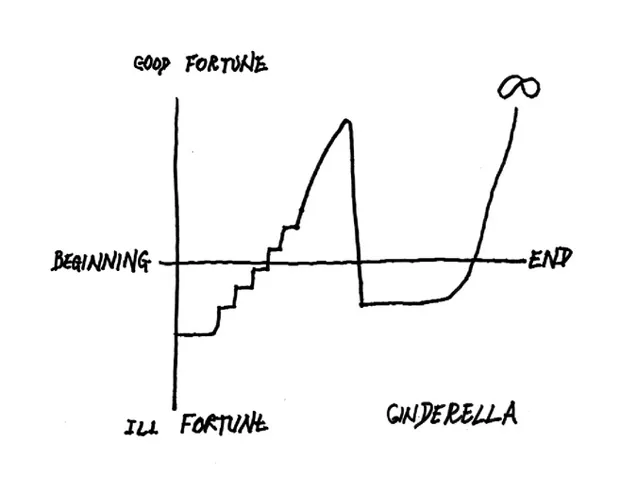


What about this [app](https://www.youtube.com/watch?v=LXqCT2nN3nU) that lets you write a story by drawing an arc that describes its sentiment over time?  

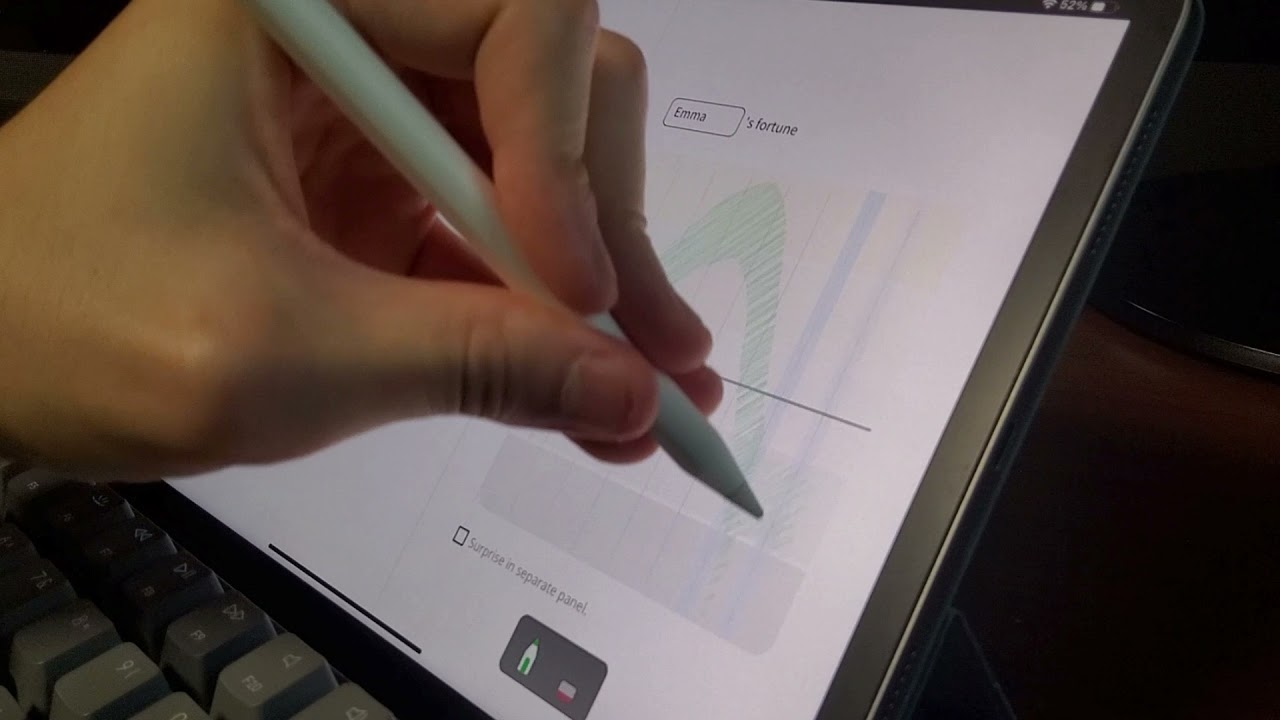



In [ ]:
sot4_sentence_sentiment_df.to_csv("sot4_sentence_sentiment.csv")

In [ ]:
sot4_sentence_sentiment_df[['polarity']].plot(figsize=(20,8))

# Dash is Recruiting Undergrad Researchers for New HCI Project

I am recruiting undergraduate researchers for a new Human-Computer Interaction research project in the Department of Computer Science that involves analyzing and writing science fiction literature to explore new conceptual metaphors and representations of AI. No coding involved, but an excitement to engage with computational thinking and scientific reasoning is a must. Visual design skills would also prove useful. 

I'll send out a messsage to the class this week with more information. This project has the option of turning into a summer job or paid position later on.